In [40]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./23_05_2019_20_36/full_results.csv')

In [25]:
print('Name: precision, recall, fscore')
print('P_bin:', precision_recall_fscore_support(df['P_bin'], df['P_bin_pred'], average='micro')[:3])
print('R_bin:', precision_recall_fscore_support(df['R_bin'], df['R_bin_pred'], average='micro')[:3])
print('Res_bin:', precision_recall_fscore_support(df['Res_bin'], df['Res_bin_pred'], average='micro')[:3])
print('Cal_bin:', precision_recall_fscore_support(df['Cal_bin'], df['Cal_bin_pred'], average='micro')[:3])

Name: precision, recall, fscore
P_bin: (0.9047619047619048, 0.9047619047619048, 0.9047619047619048)
R_bin: (0.8761904761904762, 0.8761904761904762, 0.8761904761904762)
Res_bin: (0.6190476190476191, 0.6190476190476191, 0.6190476190476191)
Cal_bin: (0.9142857142857143, 0.9142857142857143, 0.9142857142857143)


In [21]:
multi = np.array(list(zip(df['P_bin'], df['R_bin'], df['Res_bin'], df['Cal_bin'])))
multi_pred = np.array(list(zip(df['P_bin_pred'], df['R_bin_pred'], df['Res_bin_pred'], df['Cal_bin_pred'])))

In [27]:
print('Accuracy:')
print('P_bin:', accuracy_score(df['P_bin'], df['P_bin_pred']))
print('R_bin:', accuracy_score(df['R_bin'], df['R_bin_pred']))
print('Res_bin:', accuracy_score(df['Res_bin'], df['Res_bin_pred']))
print('Cal_bin:', accuracy_score(df['Cal_bin'], df['Cal_bin_pred']))
print('MultiLabel:', accuracy_score(multi, multi_pred))

Accuracy:
P_bin: 0.9047619047619048
R_bin: 0.8761904761904762
Res_bin: 0.6190476190476191
Cal_bin: 0.9142857142857143
MultiLabel: 0.4666666666666667


In [71]:
quality = pd.read_csv('./23_05_2019_20_36/quality.csv')

In [72]:
# FIX:
# quality['orig_matcher'], quality['sub_matcher'] = quality['matcher'].str.split('_', expand=True)

In [73]:
# quality = quality[~quality['matcher'].str.contains('_')].drop(['P','R','Res','Cal'], axis = 1)
quality = quality.drop(['P','R','Res','Cal'], axis = 1)

In [74]:
sums = [len(quality),] + list(quality.sum())[1:]
names = ['Total',] + list(quality.columns)[1:]
cords = list(range(len(quality.sum())))

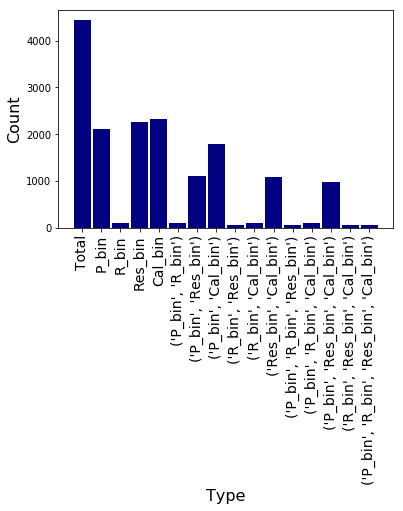

In [75]:
plt.clf()
width= 0.9
p1 = plt.bar(cords, sums, align = 'center', color = 'navy', label="Expert Types", width= width)
plt.xticks(cords, names, fontsize=14, rotation=90)
# plt.yticks(,fontsize=14)
plt.ylabel("Count", fontsize=16)
plt.xlabel("Type", fontsize=16)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fancybox=True)
# plt.savefig('control_p6.eps', bbox_inches = 'tight', format='eps')
plt.savefig('expert_types_full.jpg', bbox_inches = 'tight', format='jpg')
plt.show()